# Research Question: When and Where do the Most Intense Volcano Eruptions Occur?
#Madeleine Jones, Avery Schebell, Brandon Ou, and Brittany Nguyen


In [ ]:
#Research Question:
#####"Where and when do the most intense eruptions occur?" 
#####'Intense" defined as VEI>2

### Data Preprocessing

In [3]:
#Reading in Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in eruption data CSV
eruptions=pd.read_csv('eruptions.csv')


#Removing Missing Values
eruptions=eruptions.dropna()
#len(eruptions) # there are 1951 rows

# Read in volcano data csv
volcano=pd.read_csv('volcano.csv')


#Merging Dataframes (to obtain the location data)
joined = pd.merge(eruptions, volcano, on="volcano_number", how="inner") #inner join will only keep all records in common


#subsetting to select columns
joined=joined[['volcano_number', 'volcano_name_x', 'eruption_number',
       'eruption_category', 'area_of_activity', 'vei', 'start_year',
       'start_month', 'start_day', 'end_year',
       'end_month', 'end_day', 'latitude_x', 'longitude_x',
       'primary_volcano_type', 'last_eruption_year', 'country', 'region',
       'subregion', 'elevation',
       'tectonic_settings', 'population_within_5_km', 'population_within_10_km',
       'population_within_30_km', 'population_within_100_km']]
joined.head()

volcano_number         volcano_name_x  eruption_number   eruption_category  \
0          241040  Whakaari/White Island            22338  Confirmed Eruption   
1          241040  Whakaari/White Island            22147  Confirmed Eruption   
2          241040  Whakaari/White Island            20839  Confirmed Eruption   
3          241040  Whakaari/White Island            14495  Confirmed Eruption   
4          241040  Whakaari/White Island            14494  Confirmed Eruption   

         area_of_activity  vei  start_year  start_month  start_day  end_year  \
0  1978/90 Crater Complex  2.0      2019.0         12.0        9.0    2019.0   
1          2012 lava dome  1.0      2016.0          9.0       13.0    2016.0   
2  1978/90 Crater Complex  2.0      2012.0          8.0        7.0    2013.0   
3                 MH vent  2.0      2001.0          2.0       19.0    2001.0   
4                 MH vent  3.0      2000.0          3.0        7.0    2000.0   

   ...  last_eruption_year      country               region    subregion  \
0  ...                2019  New Zealand  New Zealand to Fiji  New Zealand   
1  ...                2019  New Zealand  New Zealand to Fiji  New Zealand   
2  ...                2019  New Zealand  New Zealand to Fiji  New Zealand   
3  ...                2019  New Zealand  New Zealand to Fiji  New Zealand   
4  ...                2019  New Zealand  New Zealand to Fiji  New Zealand   

  elevation                             tectonic_settings  \
0       294  Subduction zone / Continental crust (>25 km)   
1       294  Subduction zone / Continental crust (>25 km)   
2       294  Subduction zone / Continental crust (>25 km)   
3       294  Subduction zone / Continental crust (>25 km)   
4       294  Subduction zone / Continental crust (>25 km)   

  population_within_5_km population_within_10_km population_within_30_km  \
0                      5                       5                       5   
1                      5                       5                       5   
2                      5                       5                       5   
3                      5                       5                       5   
4                      5                       5                       5   

   population_within_100_km  
0                    190290  
1                    190290  
2                    190290  
3                    190290  
4                    190290  

[5 rows x 25 columns]

### Data Exploration

In [4]:
#Exploring "vei" variable via summary stats, mean, and correlation

##Unique vals


'''
##Min and max
print(joined['vei'].min())
print(joined['vei'].max())

##Mean
print(joined['vei'].mean())
'''

# Print stats about the joined dataframe
print('Volcano Explosivity Index 5-Number Summary')
print('Unique Values:', joined['vei'].unique())
print('Min: %.3f' % joined['vei'].min())
print('Q1: %.3f' % np.percentile(joined['vei'], 25))
print('Median: %.3f' % np.percentile(joined['vei'], 50))
print('Q3: %.3f' % np.percentile(joined['vei'], 75))
print('Max: %.3f' % joined['vei'].max())


##Correlation between vei and latitude (seems to be higher correlation between vei and longitude (eastern/western location))
print(" ")
print("Correlation between VEI and Latitude vs Longitude")
print("Latitude Correlation: ", joined['vei'].corr(joined['latitude_x'])) #position N/S 
print("Longitude Correlation: ", joined['vei'].corr(joined['longitude_x'])) #position E/W 

######################
#VEI by LOCATION:
print(" ")
print("Mean VEI by Country and Region")

##vei versus country
print(joined['vei'].groupby(joined['country']).mean())
print(" ")
##vei versus region
print(joined['vei'].groupby(joined['region']).mean())
print(" ")



Volcano Explosivity Index 5-Number Summary
Unique Values: [2. 1. 3. 0. 4. 5. 6.]
Min: 0.000
Q1: 1.000
Median: 2.000
Q3: 2.000
Max: 6.000
 
Correlation between VEI and Latitude vs Longitude
Latitude Correlation:  0.05847877028477844
Longitude Correlation:  0.10418508313032963
 
Mean VEI by Country and Region
country
Antarctica                          3.000000
Australia                           1.333333
Cameroon                            1.875000
Cape Verde                          2.000000
Chile                               2.553191
Chile-Argentina                     1.625000
China                               3.000000
Colombia                            2.125000
Comoros                             1.785714
Costa Rica                          1.812500
DR Congo                            1.750000
DR Congo-Rwanda                     1.000000
Dominica                            1.500000
Ecuador                             1.840000
El Salvador                         3.000000
Ethiopia

### Vizualizations

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 39.2 MB/s 
     |████████████████████████████████| 16.7 MB 28.9 MB/s 
     |████████████████████████████████| 44 kB 1.4 MB/s 


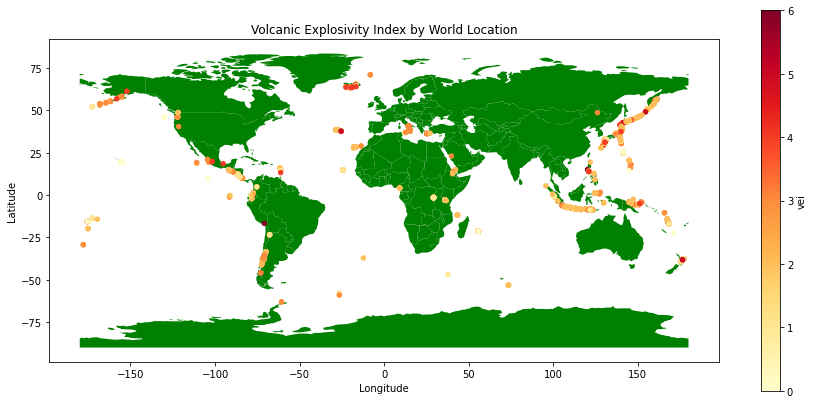

In [5]:
#Visualization Code (from class)

# Install necessary packages for plotting world plots
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# vei dataframe with only vei, longitude, and latitude
# Make axes to place everything on
fig, ax = plt.subplots(figsize=(15, 7))

# Read in world data
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

# Plot the data of the world
# The "naturalearth_lowres" dataset contains world data
world.plot(ax=ax, color='green')

# Plot vei versus longitude and latitude
joined.plot(title='Volcanic Explosivity Index by World Location', x='longitude_x', y='latitude_x', kind='scatter', c='vei', ax=ax, colormap='YlOrRd')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


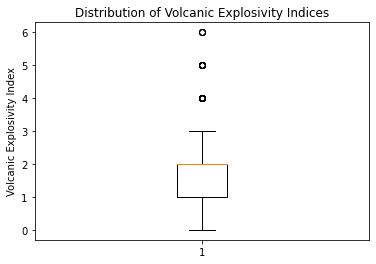

In [6]:
#plt.hist(joined['vei'], bins = 6, color = "orange")

# Create box plot
plt.boxplot(joined['vei'])
plt.title('Distribution of Volcanic Explosivity Indices')
plt.ylabel("Volcanic Explosivity Index")
plt.show()

In [7]:
# Analyze how often eruptions occur during each month
monthfreq = joined['start_month'].value_counts()

month = monthfreq.keys().values.tolist()
num = monthfreq.values.tolist()

monthfreq = pd.DataFrame(data={'Month': month, 'Counts': num})
monthfreq = monthfreq.drop(axis = 0, labels = 12)
monthfreq["Month"] = monthfreq["Month"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

monthfreq = monthfreq.reindex([0,2,10,6,5,4,3,9,7,11,1,8])

#all_eruptions = monthfreq.set_index("Month").loc[order].plot(kind="bar", legend=False, width = 0.9)
#all_eruptions.set_ylabel('Counts')
#all_eruptions.set_title("Start Months of All Eruptions")

monthfreq


Month  Counts
0    Jan     175
2    Feb     162
10   Mar     136
6    Apr     140
5    May     141
4    Jun     144
3   July     147
9    Aug     136
7    Sep     138
11   Oct     128
1    Nov     166
8    Dec     136

In [8]:
high_vei = joined.loc[joined['vei'] > 2]

high_vei_monthfreq = high_vei['start_month'].value_counts()

month = high_vei_monthfreq.keys().values.tolist()
num = high_vei_monthfreq.values.tolist()

high_vei_monthfreq = pd.DataFrame(data={'Month': month, 'Counts': num})
high_vei_monthfreq = high_vei_monthfreq.drop(axis = 0, labels = 12)

high_vei_monthfreq["Month"] = high_vei_monthfreq["Month"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

#order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

high_vei_monthfreq = high_vei_monthfreq.reindex([8,7,9,11,2,4,3,1,6,10,0,5])

#high_vei_eruptions = high_vei_monthfreq.set_index("Month").loc[order].plot(kind="bar", legend=False, width = 0.9)
#high_vei_eruptions.set_ylabel('Counts')
#high_vei_eruptions.set_title("Start Months of Eruptions with a VEI of 2 or More")
high_vei_monthfreq


Month  Counts
8    Jan      24
7    Feb      27
9    Mar      22
11   Apr      19
2    May      34
4    Jun      31
3   July      31
1    Aug      34
6    Sep      28
10   Oct      22
0    Nov      41
5    Dec      29

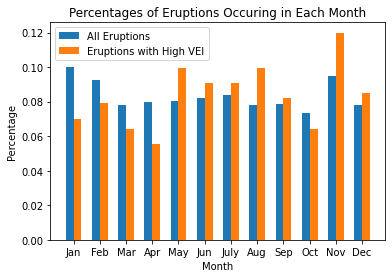

In [9]:
all = monthfreq["Counts"]/1749
# Specify the values of orange bars (height)
highfreq = high_vei_monthfreq["Counts"]/342

# Position of bars on x-axis
ind = np.arange(12)

# Figure size
#plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, all , width, label='All Eruptions')
plt.bar(ind + width, highfreq, width, label='Eruptions with High VEI')

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Percentages of Eruptions Occuring in Each Month')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Statistical Quantites

In [10]:
vei = joined['vei'].groupby(joined['region']).mean() #the regions and corres. mean veis

regions = vei.keys().values.tolist()
means = vei.values.tolist()

veistats = pd.DataFrame(data={'Region': regions, 'Mean Volcanic Explosivity Index': means})

# count of eruptions by region
counts = joined['region'].value_counts()

regions = counts.keys().values.tolist()
counts = counts.values.tolist()

eruptionstats = pd.DataFrame(data={'Region': regions, 'Total Number of Eruptions': counts})

stats = pd.merge(veistats, eruptionstats, on="Region", how="inner")
stats.sort_values(by='Total Number of Eruptions', ascending=False)

Region  Mean Volcanic Explosivity Index  \
8          Japan, Taiwan, Marianas                         1.763636   
7                        Indonesia                         1.830389   
11  Mediterranean and Western Asia                         2.092391   
12         Melanesia and Australia                         2.184874   
5         Hawaii and Pacific Ocean                         0.230769   
13    Middle East and Indian Ocean                         1.475248   
14      México and Central America                         1.881720   
17                   South America                         2.269663   
15             New Zealand to Fiji                         1.806818   
0               Africa and Red Sea                         1.772727   
6         Iceland and Arctic Ocean                         2.440000   
1                           Alaska                         2.653061   
3                   Atlantic Ocean                         2.210526   
10                   Kuril Islands                         1.870968   
9      Kamchatka and Mainland Asia                         2.607143   
16         Philippines and SE Asia                         2.368421   
4           Canada and Western USA                         2.461538   
18                     West Indies                         2.000000   
2                       Antarctica                         2.200000   

    Total Number of Eruptions  
8                         440  
7                         283  
11                        184  
12                        119  
5                         104  
13                        101  
14                         93  
17                         89  
15                         88  
0                          66  
6                          50  
1                          49  
3                          38  
10                         31  
9                          28  
16                         19  
4                          13  
18                         11  
2                           5

In [11]:
#For eruptions where vei > 2, get total number of eruptions ("most intense eruptions")
regions = high_vei['region'].value_counts().keys().values.tolist()
counts = high_vei['region'].value_counts().values.tolist()

countsstats = pd.DataFrame(data={'Region': regions, 'Total Number of Eruptions': counts})
countsstats

Region  Total Number of Eruptions
0   Mediterranean and Western Asia                         56
1          Japan, Taiwan, Marianas                         55
2                    South America                         32
3          Melanesia and Australia                         31
4                           Alaska                         30
5                        Indonesia                         29
6         Iceland and Arctic Ocean                         27
7       México and Central America                         26
8      Kamchatka and Mainland Asia                         15
9               Africa and Red Sea                         14
10             New Zealand to Fiji                         12
11                  Atlantic Ocean                          7
12         Philippines and SE Asia                          6
13                   Kuril Islands                          5
14          Canada and Western USA                          4
15    Middle East and Indian Ocean                          3
16                      Antarctica                          3
17                     West Indies                          2
18        Hawaii and Pacific Ocean                          1

### LINEAR REGRESSION (via OLS ordinary least squares method)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:            start_month   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     1.287
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           9.01e-05
Time:                        01:36:40   Log-Likelihood:                -4040.0
No. Observations:                1811   AIC:                         1.010e+04
Df Residuals:                     800   BIC:                         1.566e+04
Df Model:                        1010                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residuals')

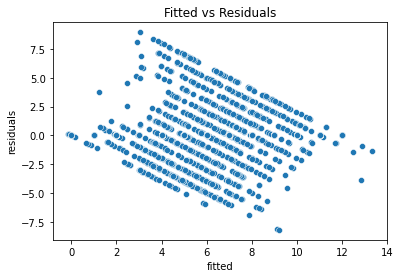

In [12]:
#Predicting start_month based off of predictors:region+latitude_x+longitude_x+vei+eruption_category+\
###area_of_activity+start_year+start_day+end_year+end_day+end_month+primary_volcano_type\
###+country+subregion+elevation+tectonic_settings' (16 total predictors)

#import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#unique value counts for the start_month (response variable we are trying to predict)
#joined.head()
joined.start_month.value_counts().sort_values(ascending=False) #the counts for each start month

#fit a regression model (fit the model onto the joined data and specify the response and predictor vars.)
regression_results = smf.ols('start_month ~  region+latitude_x+longitude_x+vei+eruption_category+\
area_of_activity+start_year+start_day+end_year+end_day+end_month+primary_volcano_type\
+country+subregion+elevation+tectonic_settings', data=joined).fit()
print(regression_results.summary())

#attributes of the model
dir(regression_results)

#parameters of the model
regression_results.params

#"diagnostic check": scatterplot of fitted versus residual values
sns.scatterplot(regression_results.fittedvalues,regression_results.resid )
plt.title('Fitted vs Residuals')
plt.xlabel('fitted')
plt.ylabel('residuals')




### UNIT TESTS

In [13]:
# volcano class
class Volcano:
    """this is a volcano object"""
    def __init__(self, vei, start_month, region):
        self.vei = vei
        self.start_month = start_month
        self.region = region
    def get_vei(self):
        return self.vei
    def get_start_month(self):
        return self.start_month
    def get_region(self):
        return self.region
# unit testing
import unittest
class VolcanoTestSuite(unittest.TestCase): 
    volcano = Volcano(3,'November','Alaska')
    def test_1_get_vei(self): 
        self.assertEqual(self.volcano.get_vei(), 3)
    def test_2_get_start_month(self): 
        self.assertEqual(self.volcano.get_start_month(),'November') 
    def test_3_get_region(self): 
        self.assertEqual(self.volcano.get_region(),'Alaska')
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'],exit=False)




        


...
----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK


In [14]:
# unit testing
import unittest
class VolcanoTestSuite(unittest.TestCase): 
    volcano = Volcano(3,'November','Alaska')
    def test_1_get_vei(self): 
        self.assertEqual(self.volcano.get_vei(), 3)
    def test_2_get_start_month(self): 
        self.assertEqual(self.volcano.get_start_month(),'November') 
    def test_3_get_region(self): 
        self.assertEqual(self.volcano.get_region(),'Alaska')
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'],exit=False)
  

...
----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK
